In [60]:
# 4 - Clasificador Bayes histograma. enfoque discreto. /home/j3nnn1/itba/deepLCourse/20210328_home_BayesDiscreto/4 - Clasific-Bayes-histograma.ipynb
# Con bayes?
# Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana.
# Desde ML que tan bien generaliza

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [62]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv') #[:100]

test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [63]:
from BiVariateJoint import BiVariateJoint

In [64]:
print(data)
print(len(data))

      Unnamed: 0  Genero    Peso   Altura
0           7620   Mujer  61.235  162.402
1           1837  Hombre  97.432  181.908
2           3311  Hombre  73.324  172.459
3           9478   Mujer  55.193  157.748
4           7805   Mujer  56.886  151.798
...          ...     ...     ...      ...
7995        6395   Mujer  62.215  160.083
7996        2714  Hombre  83.840  177.866
7997        3476  Hombre  75.461  170.910
7998        7084   Mujer  65.461  166.137
7999        3346  Hombre  80.323  171.575

[8000 rows x 4 columns]
8000


In [65]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

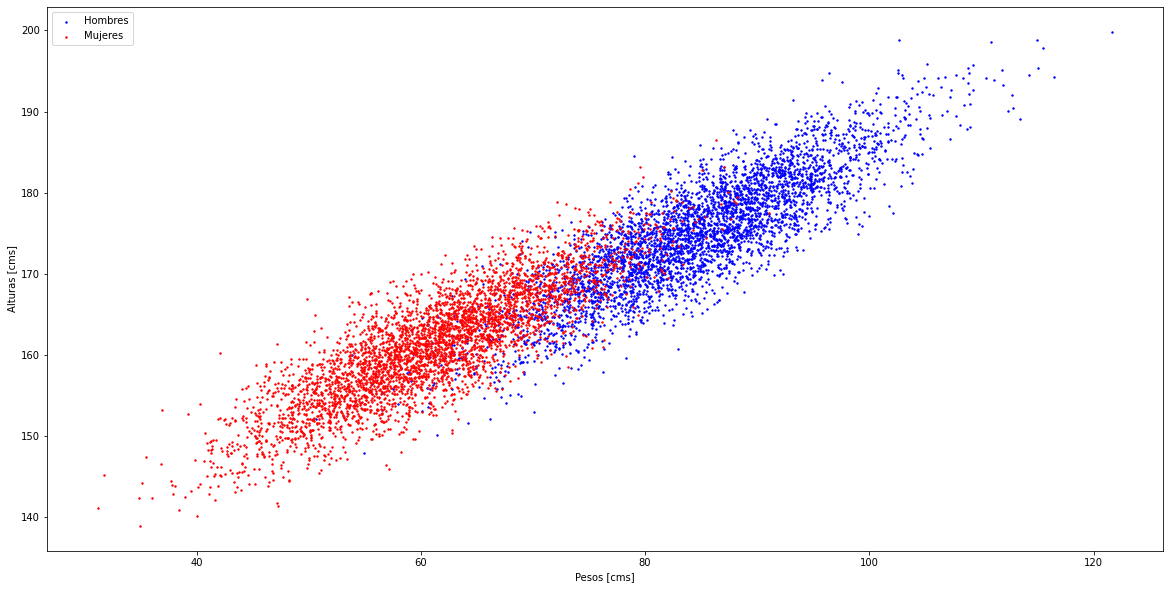

In [66]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [67]:
# Calculo a Priori.
# P(X_1,X_2 | Mujer)
# P(X_1,X_2 | Hombre)
# P (Peso y altura | Mujer)
# Estimar de P(X1,X2 | Genero) a traves de histogramas?
# Estimar la forma de la distribucion por genero
# haciendo el calculo de los bins y elaborando un histograma con la frecuencia
# de la probabilidad conjunta de altura y peso. dado genero.

from BiVariateJoint import get_class_prob

In [68]:
step = 2
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

# calculando probabilidad conjunta por genero.
joint_hombres = BiVariateJoint(data_hombres,
                               step_X = step,
                               step_Y = step,
                               mins = mins,
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres,
                               step_X = step,
                               step_Y = step,
                               mins = mins,
                               maxs = maxs)

In [69]:
print(joint_hombres)
print(type(joint_hombres))

<class 'BiVariateJoint.BiVariateJoint'>


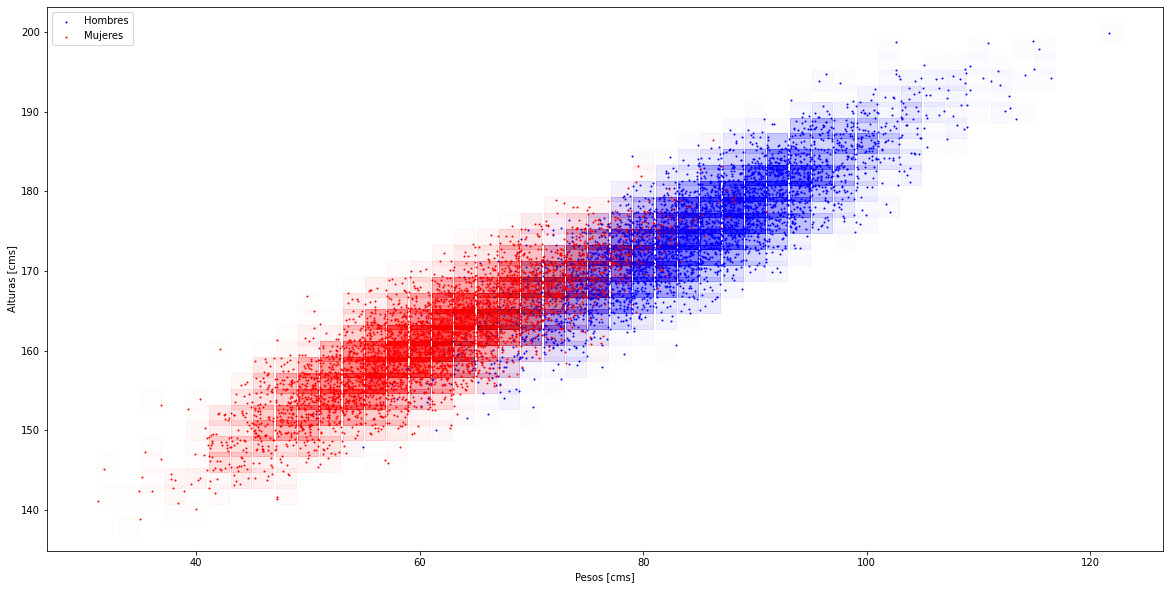

In [70]:

%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(joint_hombres.data_rounded[:,0], joint_hombres.data_rounded[:,1], color='b', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_hombres.data[:,0], joint_hombres.data[:,1], color='b', s=1,  alpha=1, label='Hombres')
ax.scatter(joint_mujeres.data_rounded[:,0], joint_mujeres.data_rounded[:,1], color='r', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_mujeres.data[:,0], joint_mujeres.data[:,1], color='r', s=1,  alpha=1, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [71]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
#     ax1.set_aspect('equal')
#     ax2.set_aspect('equal')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

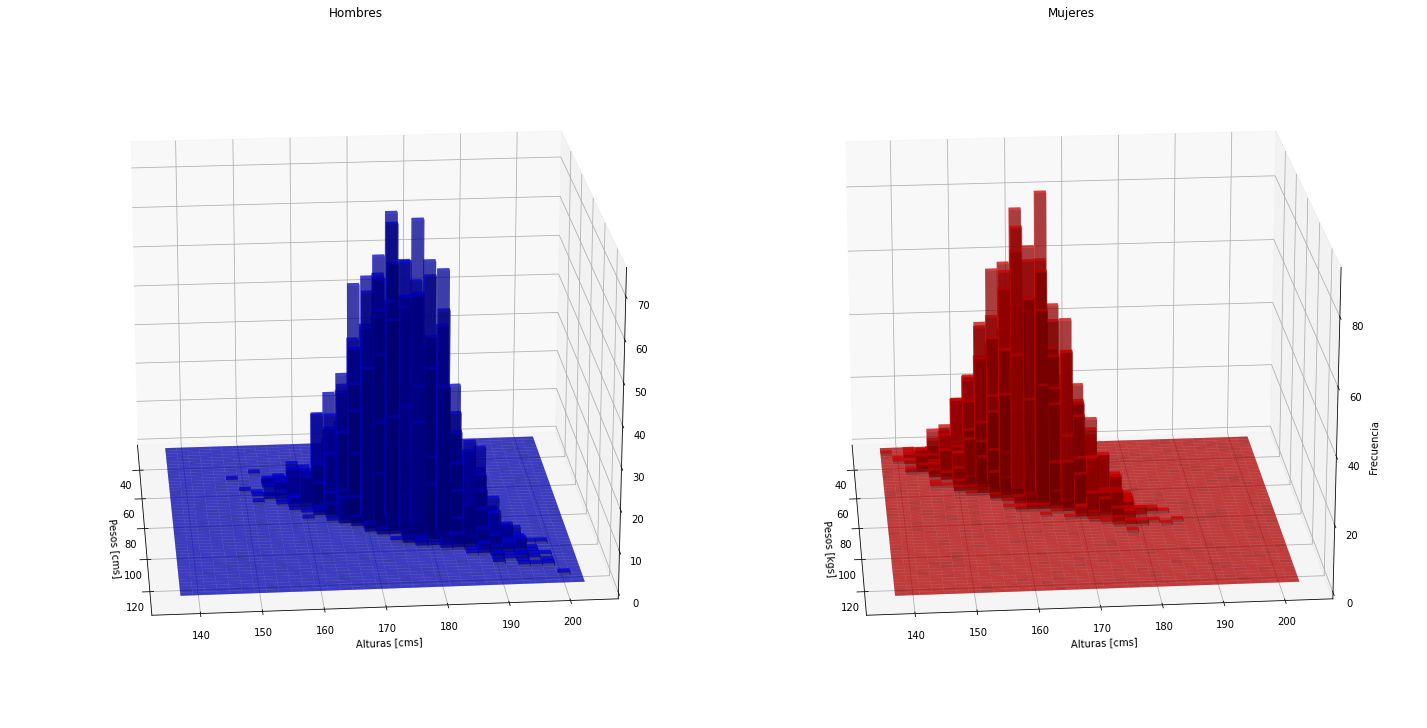

In [72]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(ax=ax1, color='b', el=20, az=-5, title='Hombres')
joint_mujeres.plot_joint_3d(ax=ax2, color='r', el=20, az=-5, title='Mujeres')

In [73]:
# Calculo a Posteriori.
# P (Hombre | Peso y altura)
# Con la probabilidad conjunta obtiene la probabilidad condicional que vendria a ser como un clasificador?
p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)

In [74]:
print(data['Peso'].values)
print(p_class_1)
print(len(p_class_1))
print(p_class_2)
print(len(p_class_2))
# p_class_1 y p_class_2 es un vector de probabilidades condicionales.
# p_class_1 => hombres
# p_class_2 => mujer

[61.235 97.432 73.324 ... 75.461 65.461 80.323]
[0.02739726 1.         0.44444444 ... 0.78688525 0.075      0.96721311]
8000
[0.97260274 0.         0.55555556 ... 0.21311475 0.925      0.03278689]
8000


In [75]:
# @TODO tutoria esto es el entrenamiento? .train de pandas? SI
acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
# lo siguiente es el accuracy del modelo estimado a partir de histogramas con step = 2
print("[TRAIN] lo siguiente es el accuracy del modelo estimado a partir de histogramas con step = 2 sobre la data de train")
print(acc_train_bayes)

[TRAIN] lo siguiente es el accuracy del modelo estimado a partir de histogramas con step = 2 sobre la data de train
0.90875


In [76]:

p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print("[TEST] lo siguiente es el accuracy del modelo estimado a partir de histogramas con step = 2 sobre la data de test")
print(acc_cv_bayes)

[TEST] lo siguiente es el accuracy del modelo estimado a partir de histogramas con step = 2 sobre la data de test
0.908


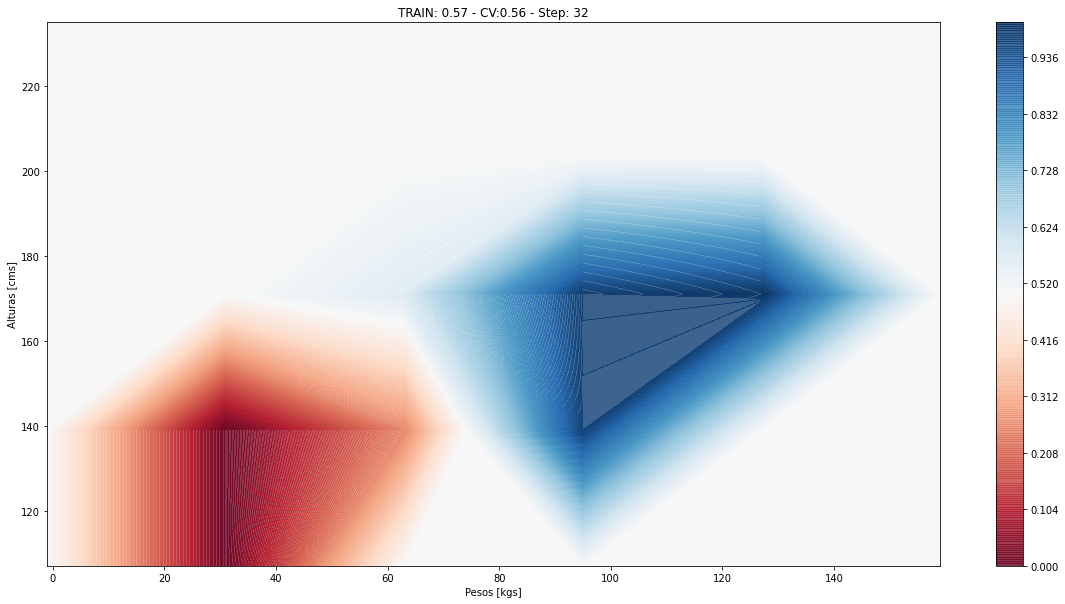

In [82]:
%matplotlib inline
from matplotlib.colors import ListedColormap
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)

## repasar shape tutoria @TODO
Z = np.zeros(X.shape) #rellenar con zeros @TODO
for i in range(X.shape[0]):
    Z[i] = get_class_prob(X[i], Y[i], joint_hombres, joint_mujeres)[0]

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_bayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

In [78]:
# A esto se le define un modelo NO parametrico porque NO asumimos que tienen o sigue una distribucion en particular.
# A partir de la probabilidad conjunta definida en los histogramas calculados y
# teniendo en cuenta como parametro  la cantidad de steps necesarios para calcular el
# numero de bins, puede variar los resultados.. Ejemplo siguiente:


In [83]:

train_acc = []
test_acc = []
steps = [2, 4,  8, 16, 32]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres,
                                   step_X = step,
                                   step_Y = step,
                                   mins = mins,
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres,
                                   step_X = step,
                                   step_Y = step,
                                   mins = mins,
                                   maxs = maxs)
    p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
    acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
    train_acc.append(acc_train_bayes)
    p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
    acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_bayes)

In [85]:
# deberia ser un vector de 5 posiciones.
print("Accuracy TRAIN")
print(train_acc)
print("Accuracy TEST")
print(test_acc)
# cuando mas general (i.e. step 32) son los bins entonces baja el accuracy y es mas general el modelo
# Esto es un modelo NO parametrico ya que genero histogramas.
# y no es INGENUO ya que calculo la probabilidad conjunta.

Accuracy TRAIN
[0.90875, 0.911125, 0.9005, 0.900875, 0.566375]
Accuracy TEST
[0.908, 0.9165, 0.9035, 0.8965, 0.563]


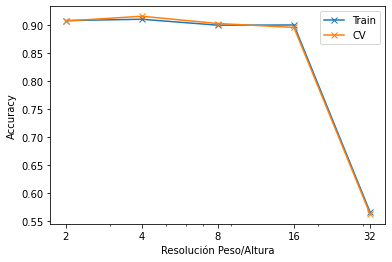

In [86]:
%matplotlib inline
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()